In [41]:
import os
import json
import geojson
import pandas as pd
import geopandas as gpd
from pandas.io.json import json_normalize
%matplotlib inline

In [20]:
os.listdir('.')

['.ipynb_checkpoints',
 'cameras.json',
 'Convert .php to .geojson.ipynb',
 'new-data.php',
 'nyc.json']

In [30]:
with open('new-data.php') as f:
    data = json.load(f)

df = json_normalize(data['markers'])
df = df[['id', 'content', 'latitude', 'longitude']]
df.head()

,id,content,latitude,longitude
0,368,1 Ave @ 110 St,40.79142677512476,-73.93807411193848
1,360,1 Ave @ 124 St,40.800426144169315,-73.93155097961426
2,361,1 Ave @ 23 St,40.7359741672444,-73.97828578948975
3,550,1 Ave @ 42 St,40.74803725830298,-73.9694881439209
4,940,1 Ave @ 62 St,40.761501,-73.960542


In [37]:
def data2geojson(df, outfile):
    features = []
    df.apply(lambda x: features.append(
        geojson.Feature(geometry=geojson.Point((float(x['longitude']),
                                                float(x['latitude']))),
                        properties=dict(name=x['id'],
                                        description=x['content']))),
            axis=1)
    with open(outfile, 'w+') as out:
        geojson.dump(geojson.FeatureCollection(features),
                     out, sort_keys=True)

In [38]:
data2geojson(df, 'cameras.geojson')

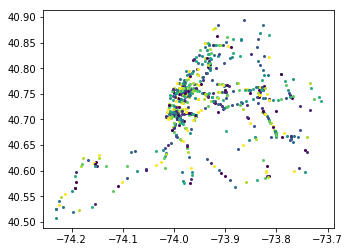

In [42]:
df = gpd.read_file('cameras.geojson')
df.plot()